# 70 mW UV beam into beam characterization chamber

- Hamamatsu R375 PMT
- SRS445A amplifier @125x amplification & @50 Ohm input impedance
- SRS HV PSU @1400 V
- 10 kHz low pass filter before the last amplification channel.
- NI PXIe-5171 Oscilloscope
- PDA25K2 @0dB gain picks up UV beam as it exits the chamber

Beam had ~70 mW when measurement was started.

Noise measurement was done by blocking the UV beam and terminating the input of the amplifier with a 50 Ohm terminating resistance.

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.integrate import simps

In [2]:
data_loc = "D:/Beam Characterization/2018_12_31/"
fname = "scatter_70mW.hdf5"

{'gain': 9.287637112720404e-05, 'offset': 0.001132200050051324, 'x_increment': 4e-09, 'absolute_initial_x': 1475078.255594328}
8.08e-03 V
Wall time: 7.27 s


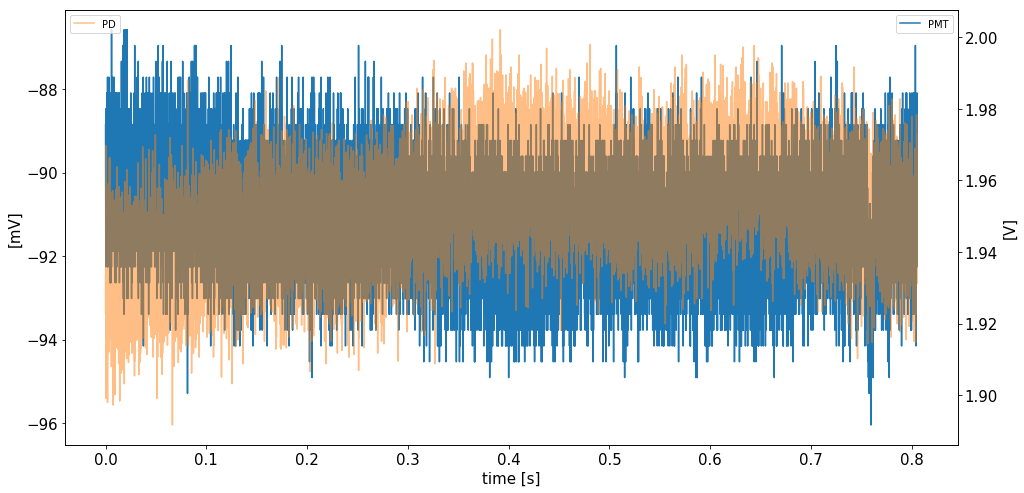

In [10]:
%%time
fname = "scatter_70mW.hdf5"

with h5py.File(data_loc+fname, 'r') as f:
    attrs_pd = dict(f['waveforms/PD_record_0'].attrs.items())
    attrs_pmt = dict(f['waveforms/PMT_record_0'].attrs.items())
    print(attrs_pd)
    pd = f['waveforms/PD_record_0'].value
    pmt = f['waveforms/PMT_record_0'].value
    
pd_gain = attrs_pd['gain']
pmt_gain = attrs_pmt['gain']
fig, ax = plt.subplots(figsize = (16,8))
x = (np.linspace(0,len(pmt)-1,len(pmt))*4e-9)[::10000]
ax.plot(x,1e3*(pmt[::10000]*pmt_gain+attrs_pmt['offset']), label = 'PMT')
ax1 = ax.twinx()
ax1.plot(x,pd[::10000]*pd_gain+attrs_pd['offset'], 'C1', alpha =0.5, label = 'PD')
ax.legend()
ax1.legend(loc = 2)
ax1.set_ylabel('[V]', fontsize = 15)
ax.set_ylabel('[mV]', fontsize = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.set_xlabel('time [s]', fontsize = 15)
print('{0:.2e} V'.format(pmt[:10000].ptp()*pmt_gain+attrs_pmt['offset']))

Text(0, 0.5, '[mV]')

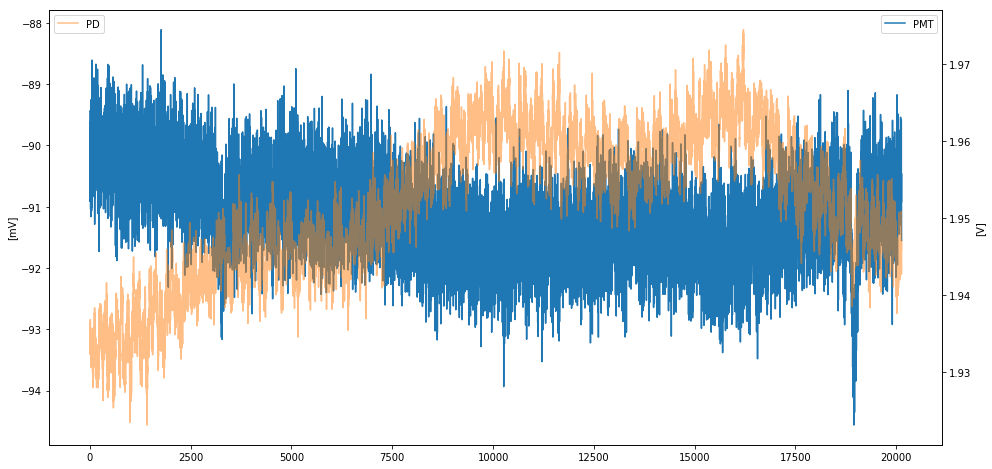

In [4]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(1e3*(np.mean(pmt[:int(len(pd)/10000)*10000].reshape(-1,10000), axis = 1)*pmt_gain+attrs_pmt['offset']), label = 'PMT')
ax1 = ax.twinx()
ax1.plot(np.mean(pd[:int(len(pd)/10000)*10000].reshape(-1,10000), axis = 1)*pd_gain+attrs_pd['offset'], 'C1', alpha =0.5, label = 'PD')
ax.legend()
ax1.legend(loc = 2)
ax1.set_ylabel('[V]')
ax.set_ylabel('[mV]')

6.94e-03 V
Wall time: 4.77 s


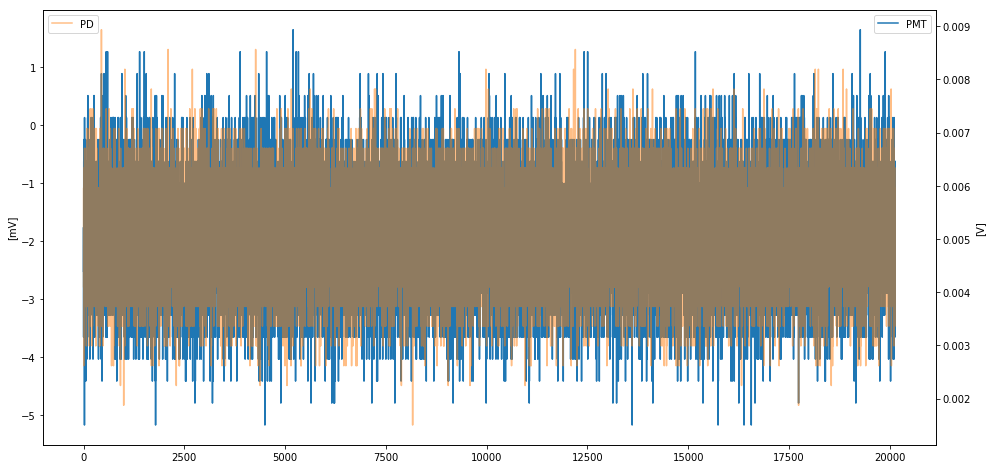

In [5]:
%%time
fname = "scatter_noise.hd5"

with h5py.File(data_loc+fname, 'r') as f:
    attrs_pd = dict(f['waveforms/PD_record_0'].attrs.items())
    attrs_pmt = dict(f['waveforms/PMT_record_0'].attrs.items())
    pd = f['waveforms/PD_record_0'].value
    pmt = f['waveforms/PMT_record_0'].value
    
pd_gain = attrs_pd['gain']
pmt_gain = attrs_pmt['gain']
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(1e3*(pmt[::10000]*pmt_gain+attrs_pmt['offset']), label = 'PMT')
ax1 = ax.twinx()
ax1.plot(pd[::10000]*pd_gain+attrs_pd['offset'], 'C1', alpha =0.5, label = 'PD')
ax.legend()
ax1.legend(loc = 2)
ax1.set_ylabel('[V]')
ax.set_ylabel('[mV]')

print('{0:.2e} V'.format(pmt[:10000].ptp()*pmt_gain+attrs_pmt['offset']))